In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
import pickle

Using TensorFlow backend.


## Import and curate dataframe

In [2]:
all_dat = pd.read_csv('./curated.csv', index_col=0)

# sift out pwrs
all_dat = all_dat.loc[all_dat['reactor_type'] == 'PWR']  
all_dat = sklearn.utils.shuffle(all_dat)
# only get assemblies with enrichment bigger than 1.5 and bunrup higher than 10,000
all_dat = all_dat.loc[(all_dat['init_enr'] > 1.5) & (all_dat['bu'] > 10000)]

# separate training and testing set
row_num = all_dat.shape[0]
cutoff = int(row_num * 0.6)
train_dat = all_dat.iloc[:cutoff, :]
test_dat = all_dat.iloc[cutoff:, :]


## Categorize Isotopes 

# ANN algorithm ( + hyperparameter grid search)
Below is an attempt to fit prediction of all isotopes in one Artificial Neural Network (ANN).
First, the dataset is fit to an array of potential hyperparameters to find the best combination of hyperparameters for best predicting the isotope composition.

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [46]:
x = all_dat[['init_enr', 'bu']].as_matrix()
y = all_dat.iloc[:,5:].as_matrix()

scaler = MinMaxScaler()
xscale = MinMaxScaler().fit(x).transform(x)
yscale = MinMaxScaler().fit(y).transform(y)
xscale

/home/teddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/teddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[0.75008463, 0.54673347],
       [0.82226367, 0.52376162],
       [0.96748791, 0.65509019],
       ...,
       [0.7846231 , 0.46500733],
       [0.59417789, 0.56739137],
       [0.45848129, 0.42917459]])

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(xscale, yscale)

In [38]:
model = Sequential()
model.add(Dense(12, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(len(yscale[0]), activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                36        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 60)                540       
Total params: 680
Trainable params: 680
Non-trainable params: 0
_________________________________________________________________


In [39]:
hist = model.fit(xtrain, ytrain, epochs=150, batch_size=50, validation_split=0.2 )

Train on 62730 samples, validate on 15683 samples
Epoch 1/150
62730/62730 [==============================] - 2s 26us/step - loss: 0.0132 - mean_squared_error: 0.0132 - mean_absolute_error: 0.0590 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - val_mean_absolute_error: 0.0286
Epoch 2/150
62730/62730 [==============================] - 1s 17us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0283 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0282
Epoch 3/150
62730/62730 [==============================] - 1s 19us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0282 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0282
Epoch 4/150
62730/62730 [==============================] - 1s 19us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0278 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0278
Epoch 5/150
62730/6273

Epoch 36/150
62730/62730 [==============================] - 1s 17us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0257 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0259
Epoch 37/150
62730/62730 [==============================] - 1s 17us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0257 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0255
Epoch 38/150
62730/62730 [==============================] - 1s 18us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0257 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0256
Epoch 39/150
62730/62730 [==============================] - 1s 16us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0257 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0257
Epoch 40/150
62730/62730 [==============================] - 1s 17us/

62730/62730 [==============================] - 1s 16us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0257
Epoch 72/150
62730/62730 [==============================] - 1s 16us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0257
Epoch 73/150
62730/62730 [==============================] - 1s 16us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0262
Epoch 74/150
62730/62730 [==============================] - 1s 16us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0254
Epoch 75/150
62730/62730 [==============================] - 1s 16us/step - loss: 

62730/62730 [==============================] - 1s 16us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0253
Epoch 107/150
62730/62730 [==============================] - 1s 17us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0257
Epoch 108/150
62730/62730 [==============================] - 1s 16us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0255
Epoch 109/150
62730/62730 [==============================] - 1s 17us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0253
Epoch 110/150
62730/62730 [==============================] - 1s 17us/step - lo

62730/62730 [==============================] - 1s 17us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0253 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0251
Epoch 142/150
62730/62730 [==============================] - 1s 17us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0253 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0252
Epoch 143/150
62730/62730 [==============================] - 1s 17us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0254 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0256
Epoch 144/150
62730/62730 [==============================] - 1s 17us/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0253 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0252
Epoch 145/150
62730/62730 [==============================] - 1s 17us/step - lo

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


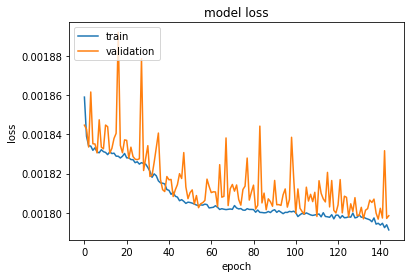

In [42]:
print(hist.history.keys())
plt.plot(hist.history['loss'][5:])
plt.plot(hist.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
xnew = np.array([[0.75008463, 0.54673347]])
ynew = model.predict(xnew)
print('x=%s, predicted=%s' % (xnew[0], ynew[0]))

x=[0.75008463 0.54673347], predicted=[0.15024033 0.5597974  0.05207199 0.17899795 0.4483559  0.34196988
 0.5679128  0.30003136 0.6501709  0.5218535  0.1505462  0.20264673
 0.4746789  0.6912303  0.6327851  0.6312663  0.19885199 0.4418804
 0.5264809  0.5193584  0.55533075 0.445346   0.02029455 0.4232954
 0.5039122  0.11641708 0.20302732 0.06423789 0.03724489 0.10469877
 0.5345465  0.4824323  0.5104123  0.29380053 0.14626978 0.33818832
 0.00866233 0.01271217 0.34150854 0.37649265 0.13648646 0.10484114
 0.1531485  0.08343069 0.38055402 0.46281952 0.27735794 0.6932062
 0.59152275 0.34082144 0.07565954 0.58338374 0.5657876  0.5722901
 0.5909438  0.5081615  0.60241425 0.2119329  0.26509112 0.6103866 ]


In [9]:
# grid search to find best hyperparameter

def create_model(optimizer='adam', learn_rate=0.01, momentum=0,
                 activation='relu', neurons=1,
                 hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=2, activation=activation))
    # consider putting in dropout?
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(60, activation='linear'))
    model.compile(loss='mean_absolute_percentage_error', optimizer=optimizer,
                  metrics=['mean_absolute_percentage_error'])
    return model

x = all_dat[['init_enr', 'bu']].as_matrix()
y = all_dat.iloc[:,4:]

model = KerasRegressor(build_fn=create_model, verbose=0)
param_grid = dict(batch_size=[10, 20, 40, 60, 80],
                  epochs=[10, 50, 100, 200],
                  optimizer=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
                  # learn rate and momentum implementation???
                  activation = ['relu', 'softmax', 'softplus', 'softsign', 'tanh', 'linear'],
                  neurons = [1, 5, 10, 20, 40, 80],
                  hidden_layers = [0, 1, 3, 5, 10]
                  )
result_dict = {}

# for every hyperparameter, run a grid search
for param, param_list in param_grid.items():
    print(param, '\n\n')
    use = {param: param_list}
    grid = GridSearchCV(estimator=model, param_grid=use)
    grid_result = grid.fit(x, y)
    result_dict[param] = (grid_result.best_score_, grid_result.best_params_)
    # summarize results
    print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']

    #for mean, stdev. param in zip(means, stds, params):
    #    print('%f (%f) with: %r' %(mean, stdev, param))


/home/teddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


batch_size 


Best: -37339.711532 using {'batch_size': 20}
epochs 


Best: -26118.439008 using {'epochs': 100}
optimizer 




/home/teddy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -64947.839717 using {'optimizer': 'Adamax'}
activation 


Best: -54298.198281 using {'activation': 'softsign'}
neurons 


Best: -72339.409573 using {'neurons': 1}
hidden_layers 


Best: -28876.054232 using {'hidden_layers': 10}


In [19]:
result_dict

{'batch_size': (-37339.71153245486, {'batch_size': 20}),
 'epochs': (-26118.439008011042, {'epochs': 100}),
 'optimizer': (-64947.83971664397, {'optimizer': 'Adamax'}),
 'activation': (-54298.19828140842, {'activation': 'softsign'}),
 'neurons': (-72339.40957284004, {'neurons': 1}),
 'hidden_layers': (-28876.054231980685, {'hidden_layers': 10})}

In [20]:
# use the best:
def get_val(dictionary, key):
    return dictionary[key][1][key]
batch_size = get_val(result_dict, 'batch_size')
epochs = get_val(result_dict, 'epochs')
optimizer = get_val(result_dict, 'optimizer')
activation = get_val(result_dict, 'activation')
neurons = get_val(result_dict, 'neurons')
hidden_layer = get_val(result_dict, 'hidden_layers')
def create_model(optimizer='adam', learn_rate=0.01, momentum=0,
                 activation='relu', neurons=1,
                 hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=2, activation=activation))
    # consider putting in dropout?
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(60, activation='linear'))
    model.compile(loss='mean_absolute_percentage_error', optimizer=optimizer,
                  metrics=['mean_absolute_percentage_error'])
    return model

x = all_dat[['init_enr', 'bu']].as_matrix()
y = all_dat.iloc[:,4:]

model =  create_model(optimizer=optimizer, activation=activation, neurons=neurons,
                     hidden_layers=hidden_layer)
print(model)
model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_split=0.3)
model.evaluate


/home/teddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train on 73185 samples, validate on 31366 samples
Epoch 1/100
73185/73185 [==============================] - 24s 334us/step - loss: 88177.8860 - mean_absolute_percentage_error: 88177.8860 - val_loss: 76297.6464 - val_mean_absolute_percentage_error: 76297.6464
Epoch 2/100
73185/73185 [==============================] - 18s 243us/step - loss: 71776.8624 - mean_absolute_percentage_error: 71776.8624 - val_loss: 66387.5748 - val_mean_absolute_percentage_error: 66387.5748
Epoch 3/100
73185/73185 [==============================] - 17s 227us/step - loss: 71383.8011 - mean_absolute_percentage_error: 71383.8011 - val_loss: 86997.0727 - val_mean_absolute_percentage_error: 86997.0727
Epoch 4/100
73185/73185 [==============================] - 16s 218us/step - loss: 72922.7693 - mean_absolute_percentage_error: 72922.7693 - val_loss: 66281.3289 - val_mean_absolute_percentage_error: 66281.3289
Epoch 5/100
73185/73185 [==============================] - 16s 217us/step - loss: 75174.1389 - mean_absolute_p

Epoch 78/100
73185/73185 [==============================] - 15s 208us/step - loss: 70375.6989 - mean_absolute_percentage_error: 70375.6989 - val_loss: 74180.0553 - val_mean_absolute_percentage_error: 74180.0553
Epoch 79/100
73185/73185 [==============================] - 16s 212us/step - loss: 70814.4295 - mean_absolute_percentage_error: 70814.4295 - val_loss: 85027.3690 - val_mean_absolute_percentage_error: 85027.3690
Epoch 80/100
73185/73185 [==============================] - 15s 211us/step - loss: 70454.8263 - mean_absolute_percentage_error: 70454.8263 - val_loss: 86863.8476 - val_mean_absolute_percentage_error: 86863.8476
Epoch 81/100
73185/73185 [==============================] - 15s 210us/step - loss: 70866.0745 - mean_absolute_percentage_error: 70866.0745 - val_loss: 90682.0947 - val_mean_absolute_percentage_error: 90682.0947
Epoch 82/100
73185/73185 [==============================] - 15s 210us/step - loss: 69912.6575 - mean_absolute_percentage_error: 69912.6575 - val_loss: 52640

<bound method Sequential.evaluate of <keras.models.Sequential object at 0x7f0e9c2dd710>>

## Test the trained model

In [ ]:
testx = x[300]
prediction = model.predict(x)
iso_list = list(y)

In [ ]:
err = []

for indx, val in enumerate(prediction[300]):
    err.append((val-np.array(y.iloc[300])[indx]) / np.array(y.iloc[300])[indx])
    print(iso_list[indx], '\t\t', val, '\t\t', np.array(y.iloc[300])[indx])

print('\n\n\n')
    
for indx, val in enumerate(err):
    print(iso_list[indx], '\t', err[indx])